[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Bratusse/WGAN-caustics/blob/main/poisson/Caustics_using_Poisson_equation.ipynb)

This notebook is an implementation of the technique presented in this paper https://www.researchgate.net/publication/274483217_Poisson-Based_Continuous_Surface_Generation_for_Goal-Based_Caustics.
There are some variations in the way the loss is calculated, but the rest is as described in the paper. **I am not the inventor of the technique**, but merely a programming enthusiast, and an optics addict. :)

The output file is supposed to be used directly in Blender, with a screen positioned at y=H, and rendering with LuxRender engines.

You have to choose **one variation** or the other, usually, the "Mesh-cells variation" is faster and gives better, more contrasted results. I kept the other because it is supposed to be more close to the theory, and doesn't interpolate the loss.

If you want to contact me you can send me an email, I'd be happy to hear about the way this tool can be used : maxime.renault@mines-paristech.fr.

# Install Fenics and other libraries

In [ ]:
!sudo apt-key del 7fa2af80
!sudo apt-key adv --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/3bf863cc.pub

OK
Executing: /tmp/apt-key-gpghome.435IM4AtXC/gpg.1.sh --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/3bf863cc.pub
gpg: requesting key from 'http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/3bf863cc.pub'
gpg: key A4B469963BF863CC: public key "cudatools <cudatools@nvidia.com>" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [ ]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

--2022-05-11 19:36:16--  https://fem-on-colab.github.io/releases/fenics-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2831 (2.8K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   2.76K  --.-KB/s    in 0s      

2022-05-11 19:36:16 (27.0 MB/s) - ‘/tmp/fenics-install.sh’ saved [2831/2831]

+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/e9e1ba9/releases/pybind11-install.sh
+ [[ https://github.com/fem-on-colab/fem-on-colab.github.io/raw/e9e1ba9/releases/pybind11-install.sh == http* ]]
+ PYBIND11_

In [ ]:
!pip install trimesh
!pip install shapely
!pip install rtree

     |████████████████████████████████| 646 kB 5.1 MB/s 
     |████████████████████████████████| 1.0 MB 5.0 MB/s 


# Imports

In [ ]:
!git clone https://github.com/Bratusse/WGAN_caustics.git
%cd WGAN_caustics/src/poisson/
from poisson_caustics import CausticsDesign
import PIL
import matplotlib as plt
%cd ../../..

In [ ]:
%matplotlib inline

# Parameters

In [ ]:
#@title Titre par défaut
file_name = 'image_oeil'
file_ext = '.jpg'
object_size = 1.        # Width size in meters
res_img =     250       # Number of pixels in width that you want (resizing is performed automatically)
it_nb =       20        # Number of iterations to do (usually the more the better)
rho =         1.49      # Refraction index of the material used to 
H =           2.        # Distance to the screen (in meters)
voron =       False     # Using Voronoi method or Cell method

# Code

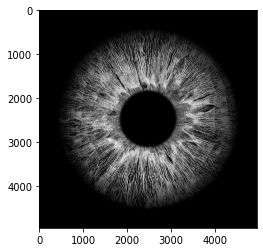

In [ ]:
img_grey = PIL.Image.open(file_name+file_ext).convert('L')
mydesign = CausticsDesign("mydesign", img_grey, object_size)

mydesign.generate_grid_mesh(res_img)
mydesign.compute_loss(voron)
mydesign.show_image()

In [ ]:
mydesign.show_loss()

In [ ]:
mydesign.compute_transport_map(it_nb)

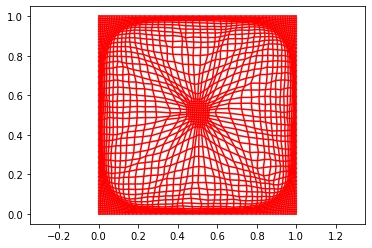

In [ ]:
strife = 3
plt.plot(mydesign.lens_grid[::strife,::strife,0],mydesign.lens_grid[::strife,::strife,1], 'r-');
plt.plot(mydesign.lens_grid[::strife,::strife,0].T,mydesign.lens_grid[::strife,::strife,1].T, 'r-');
plt.axis('equal');

# Compute the height and save to .stl

In [ ]:
mydesign.compute_height(rho, H);
mydesign.save_mesh()
mydesign.show_height()